In [ ]:
import numpy as np
import pandas as pd
import  seaborn  as sns
import matplotlib.pyplot  as plt

In [ ]:
df=pd.read_csv("adipurush_tweets.csv")

In [ ]:
df.head()

,Date Created,Number of Likes,Tweets
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...
2,2023-06-30 09:20:22+00:00,0,@ponilemova #Adipurush
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...
4,2023-06-30 09:15:22+00:00,3,ST: #Adipurush https://t.co/lsGKcgQuKL


In [ ]:
#cheak info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     10001 non-null  object
 1   Number of Likes  10001 non-null  int64 
 2   Tweets           10001 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
#cheak null  value
df.isnull().sum()

Date Created       0
Number of Likes    0
Tweets             0
dtype: int64

In [ ]:
df.describe()

,Number of Likes
count,10001.000000
mean,73.537146
std,369.687928
min,0.000000
25%,0.000000
50%,1.000000
75%,9.000000
max,14778.000000


In [ ]:
df.nunique()

Date Created       9831
Number of Likes     718
Tweets             9874
dtype: int64

In [ ]:
df.sorted=df.sort_values(by='Number of Likes',ascending=False)

<ipython-input-117-6728cf770032>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df.sorted

,Date Created,Number of Likes,Tweets
5036,2023-06-26 02:51:52+00:00,14778,Pan India Star #Prabhas clearly said NO for #A...
2975,2023-06-27 12:35:31+00:00,8266,#Breaking: Comments by Allahabad high court to...
8180,2023-06-24 09:10:09+00:00,8112,#Adipurush #Prabhas #BhushanKumar https://t.co...
3593,2023-06-27 02:23:37+00:00,7010,"आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा..."
6069,2023-06-25 07:20:59+00:00,5580,👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...
...,...,...,...
5663,2023-06-25 12:46:08+00:00,0,Yeh hai UP ke #Adipurush
5656,2023-06-25 12:52:25+00:00,0,#pakisthanBetavirendrasehwagh #adipurush #prabhas
5648,2023-06-25 13:01:20+00:00,0,"@virendersehwag Hey gutka man how are you ,can..."
5645,2023-06-25 13:02:53+00:00,0,And the award for best tweet on #Adipurush goe...


In [ ]:
df['Date Created']=pd.to_datetime(df['Date Created'])

In [ ]:
df['Date Created']

0       2023-06-30 09:21:00+00:00
1       2023-06-30 09:20:57+00:00
2       2023-06-30 09:20:22+00:00
3       2023-06-30 09:20:00+00:00
4       2023-06-30 09:15:22+00:00
                   ...           
9996    2023-06-23 10:08:50+00:00
9997    2023-06-23 10:08:49+00:00
9998    2023-06-23 10:08:17+00:00
9999    2023-06-23 10:08:01+00:00
10000   2023-06-23 10:07:45+00:00
Name: Date Created, Length: 10001, dtype: datetime64[ns, UTC]

In [ ]:
df_sorted_date=df.sort_values('Date Created')

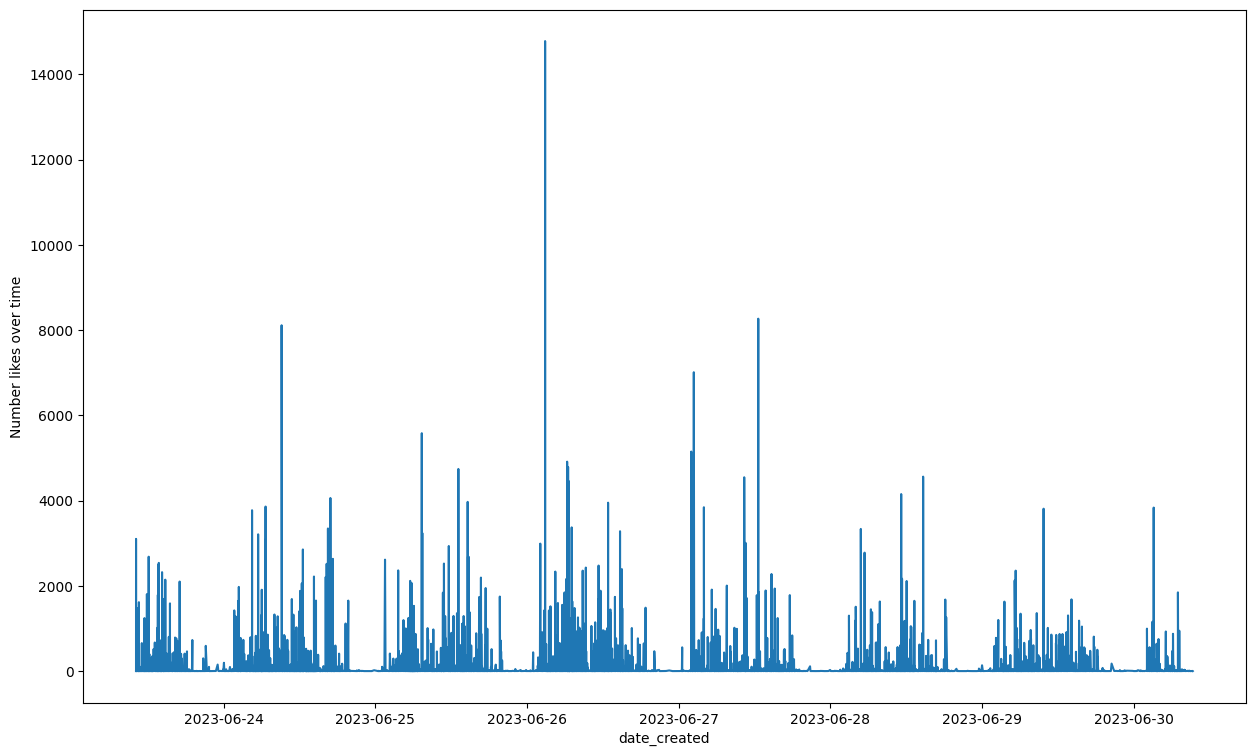

In [ ]:
plt.figure(figsize=[15,9])
plt.plot(df_sorted_date['Date Created'],df_sorted_date['Number of Likes'])
plt.xlabel('date_created')
plt.ylabel('Number likes over time')
plt.show()

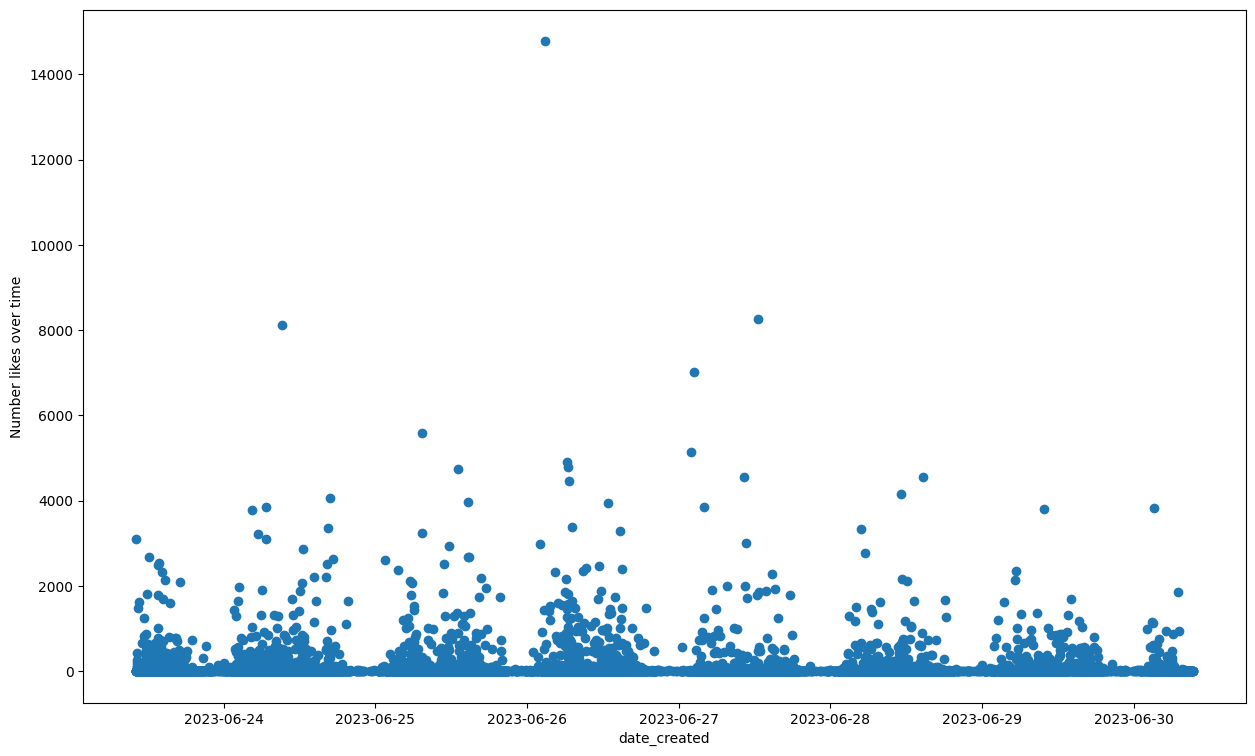

In [ ]:
plt.figure(figsize=[15,9])
plt.scatter(df_sorted_date['Date Created'],df_sorted_date['Number of Likes'])
plt.xlabel('date_created')
plt.ylabel('Number likes over time')
plt.show()

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px
fig=px.scatter(df_sorted_date,x='Date Created',y='Number of Likes',title='Number of likes over time')
fig.update_xaxes(title='Date Created')
fig.update_yaxes(title='Number of Likes')



In [ ]:
pip install tqdm


In [ ]:
!pip install python-dateutil

In [ ]:
import re
import string
from tqdm.notebook import tqdm
import dateutil.parser

from datetime import datetime


In [ ]:
!pip install pyspellchecker i

In [ ]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import  SentimentIntensityAnalyzer as SIA




In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
languages=stopwords.fileids()
print("number of supported languages:",len(languages))
print("support language",languages)

number of supported languages: 29
support language ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
english_stopwords=stopwords.words('english')
hinglish_stopwords=stopwords.words('hinglish')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

def  clean_tweet(tweet):
  #remove url hashtag mentation and speciall charecter
  tweet=re.sub(r"http\S+|www\S+|@\w+|#\w+","",tweet)
  tweet=re.sub(r"[^\w\s]", "",tweet)
  #tokenize the tweet
  tokenizer=TweetTokenizer(preserve_case=False,reduce_len=True,strip_handles=True)
  tokens=tokenizer.tokenize(tweet)
  #remove the stopwordfor english and hicglish
  tokens=[token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]
  #REMOVE punctuation and convert lower case
  tokens=[token.translate(str.maketrans('','',string.punctuation)) for token in tokens]
  tokens=[token.lower() for token in tokens]
  #join token back into string
  cleaned_tweet=' '.join(tokens)
  return cleaned_tweet



In [ ]:
df['cleaned_tweets'] = df['Tweets'].apply(clean_tweet)

In [ ]:
df.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes 2023 live streaming broadcast tv ...
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket
2,2023-06-30 09:20:22+00:00,0,@ponilemova #Adipurush,
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs 72 hoorain vs kerala story contro...
4,2023-06-30 09:15:22+00:00,3,ST: #Adipurush https://t.co/lsGKcgQuKL,st


In [ ]:
df.tail()

,Date Created,Number of Likes,Tweets,cleaned_tweets
9996,2023-06-23 10:08:50+00:00,0,Adipurush 1st Week WW Box Office Collections: ...,adipurush 1st week ww box office collections ఆ...
9997,2023-06-23 10:08:49+00:00,0,#GodMorningFriday\nवास्तव में #Adipurush यानि ...,वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...
9998,2023-06-23 10:08:17+00:00,3101,Let the empowering lyrics of #Shivoham elevate...,empowering lyrics elevate spirit envelop world...
9999,2023-06-23 10:08:01+00:00,0,When it comes to choosing a service or product...,choosing service product beneficial opt authen...
10000,2023-06-23 10:07:45+00:00,0,"A film about #Ramayana, our greatest epic coul...",film greatest epic earn boc worth budget shame...


In [ ]:
def clean_text(text):
  text=text.lower()
  return text.strip()

In [ ]:
df.cleaned_tweets=df.cleaned_tweets.apply(lambda x:clean_text(x))

In [ ]:
df.cleaned_tweets

0        womens ashes 2023 live streaming broadcast tv ...
1                                      playing book ticket
2                                                         
3        adipurush vs 72 hoorain vs kerala story contro...
4                                                       st
                               ...                        
9996     adipurush 1st week ww box office collections ఆ...
9997     वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...
9998     empowering lyrics elevate spirit envelop world...
9999     choosing service product beneficial opt authen...
10000    film greatest epic earn boc worth budget shame...
Name: cleaned_tweets, Length: 10001, dtype: object

In [ ]:
def tokenizatio(text):
  tokens=re.split('W+',text)
  return tokens

In [ ]:
df.cleaned_tweets=df.cleaned_tweets.apply(lambda x:tokenizatio(x))

In [ ]:
df.cleaned_tweets

0        [womens ashes 2023 live streaming broadcast tv...
1                                    [playing book ticket]
2                                                       []
3        [adipurush vs 72 hoorain vs kerala story contr...
4                                                     [st]
                               ...                        
9996     [adipurush 1st week ww box office collections ...
9997     [वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह ...
9998     [empowering lyrics elevate spirit envelop worl...
9999     [choosing service product beneficial opt authe...
10000    [film greatest epic earn boc worth budget sham...
Name: cleaned_tweets, Length: 10001, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def lemmatizer(telemmatizerxt):
  lemm_text="".join([wordnet_lemmatizer.lemmatize(word) for word in text])
  return lemm_text

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text


In [ ]:
df.cleaned_tweets=df.cleaned_tweets.apply(lambda x:lemmatizer(x))

In [ ]:
df.cleaned_tweets

0        womens ashes 2023 live streaming broadcast tv ...
1                                      playing book ticket
2                                                         
3        adipurush vs 72 hoorain vs kerala story contro...
4                                                       st
                               ...                        
9996     adipurush 1st week ww box office collections ఆ...
9997     वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...
9998     empowering lyrics elevate spirit envelop world...
9999     choosing service product beneficial opt authen...
10000    film greatest epic earn boc worth budget shame...
Name: cleaned_tweets, Length: 10001, dtype: object

In [ ]:
def remove_digit(text):
  clean_text=re.sub(r"\b[0-9]+\b\s*", "",text)
  return(text)

In [ ]:
df.cleaned_tweets=df.cleaned_tweets.apply(lambda x: remove_digit(x))

In [ ]:
def remove_digits1(sample_text):
  clean_text=" ".join([w for w in sample_text.split() if not w.isdigit()])
  return(clean_text)

In [ ]:
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: remove_digits1(x))


In [ ]:
!pip install  langdetect

In [ ]:
from langdetect import detect
def detect_language(text):
  try:
     lang=detect(text)
     return lang
  except:
     return None

In [ ]:
df['language']=df['cleaned_tweets'].apply(detect_language)

In [ ]:
df.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets,language
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes live streaming broadcast tv chann...,en
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket,en
2,2023-06-30 09:20:22+00:00,0,@ponilemova #Adipurush,,None
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs hoorain vs kerala story controver...,en
4,2023-06-30 09:15:22+00:00,3,ST: #Adipurush https://t.co/lsGKcgQuKL,st,no


In [ ]:
df1=df.copy()

In [ ]:
df1['english_tweets']=df[df['language']=='en']['cleaned_tweets']

In [ ]:
df1.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets,language,english_tweets
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes live streaming broadcast tv chann...,en,womens ashes live streaming broadcast tv chann...
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket,en,playing book ticket
2,2023-06-30 09:20:22+00:00,0,@ponilemova #Adipurush,,None,NaN
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs hoorain vs kerala story controver...,en,adipurush vs hoorain vs kerala story controver...
4,2023-06-30 09:15:22+00:00,3,ST: #Adipurush https://t.co/lsGKcgQuKL,st,no,NaN


In [ ]:
df1=df1.dropna()

In [ ]:
df1.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets,language,english_tweets
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes live streaming broadcast tv chann...,en,womens ashes live streaming broadcast tv chann...
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket,en,playing book ticket
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs hoorain vs kerala story controver...,en,adipurush vs hoorain vs kerala story controver...
5,2023-06-30 09:08:27+00:00,1,This is how the story should be told. @omraut ...,story told learn hotstar india graphic india g...,en,story told learn hotstar india graphic india g...
8,2023-06-30 09:04:09+00:00,0,@VikasAgarwalll Milord says: If my compatriots...,milord compatriots backstab ie end exposing fa...,en,milord compatriots backstab ie end exposing fa...


In [ ]:
df1['Year']=df1['Date Created'].dt.year
df1['Month']=df1['Date Created'].dt.month
df1['day']=df1['Date Created'].dt.day

In [ ]:
df1.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets,language,english_tweets,Year,Month,day
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes live streaming broadcast tv chann...,en,womens ashes live streaming broadcast tv chann...,2023,6,30
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket,en,playing book ticket,2023,6,30
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs hoorain vs kerala story controver...,en,adipurush vs hoorain vs kerala story controver...,2023,6,30
5,2023-06-30 09:08:27+00:00,1,This is how the story should be told. @omraut ...,story told learn hotstar india graphic india g...,en,story told learn hotstar india graphic india g...,2023,6,30
8,2023-06-30 09:04:09+00:00,0,@VikasAgarwalll Milord says: If my compatriots...,milord compatriots backstab ie end exposing fa...,en,milord compatriots backstab ie end exposing fa...,2023,6,30


In [ ]:
df1.nunique()

Date Created       5080
Number of Likes     562
Tweets             5071
cleaned_tweets     4487
language              1
english_tweets     4487
Year                  1
Month                 1
day                   8
dtype: int64

In [ ]:
df1.describe()

,Number of Likes,Year,Month,day
count,5119.000000,5119.0,5119.0,5119.000000
mean,101.315687,2023.0,6.0,25.848603
std,455.473166,0.0,0.0,2.009535
min,0.000000,2023.0,6.0,23.000000
25%,0.000000,2023.0,6.0,24.000000
50%,2.000000,2023.0,6.0,26.000000
75%,12.000000,2023.0,6.0,27.000000
max,14778.000000,2023.0,6.0,30.000000


In [ ]:
df1['time']=df1['Date Created'].dt.time

In [ ]:
df1['Tweet_length']=df1['english_tweets'].str.len()

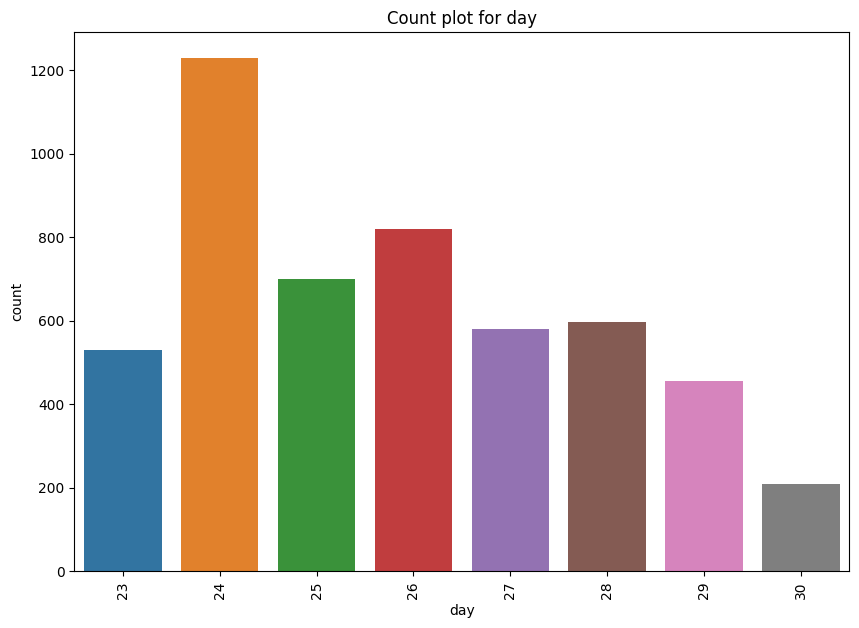

In [ ]:
plt.figure(figsize=[10,7])
sns.countplot(x='day',data=df1 )#palette='his'
plt.title('Count plot for day')
plt.xticks(rotation=90)
plt.show()

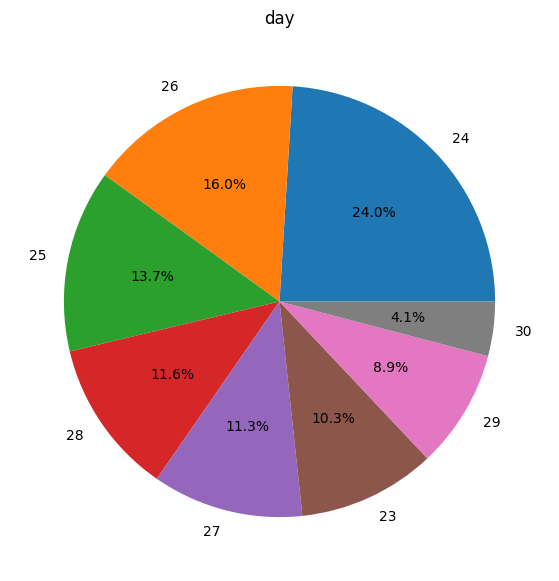

In [ ]:
plt.figure(figsize=[10,7])
counts=df1['day'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title('day')
plt.show()

In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig=go.Figure(data=[go.Bar(x=df1['day'].value_counts().index,y=df1['day'].value_counts())])
fig.update_layout(
    title='day',
    xaxis_title='categories',
    yaxis_title='Counts'
    )
fig.show()



In [ ]:
counts=df1['day'].value_counts()
fig=go.Figure(data=[go.Pie(labels=counts.index,values=counts)])
fig.update_layout(title='day')
fig.show()

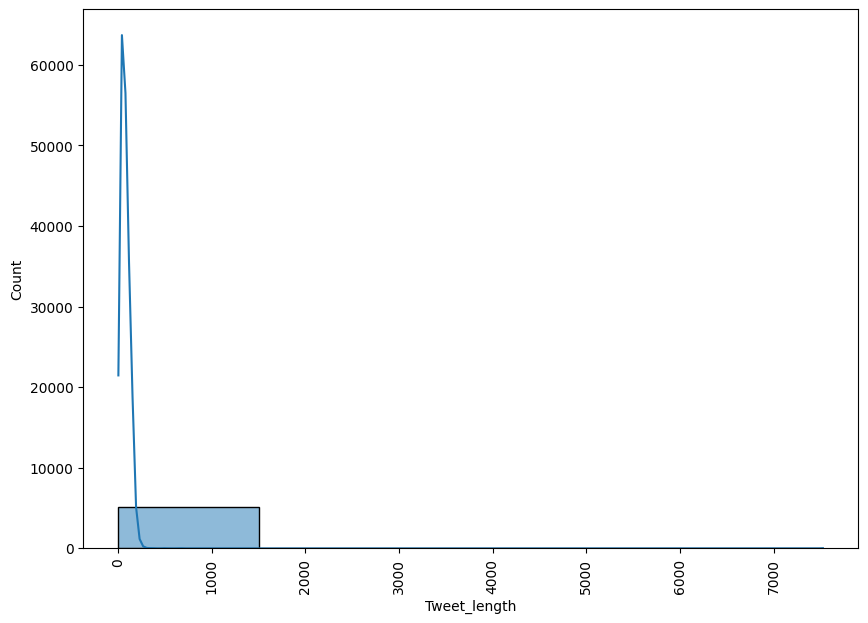

In [ ]:
plt.figure(figsize=[10,7])
sns.histplot(df1['Tweet_length'],kde=True,bins=5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.histogram(df1,x='Tweet_length',nbins=20,histnorm='density')
fig.update_layout(title=f"Histogram of tweet length",xaxis_title='Tweet_Length',yaxis_title='density')
fig.show()

In [ ]:
spell=SpellChecker()

In [ ]:
def label_sentiment(x:float):
  if x<-0.05: return 'negative'
  if x>0.35: return 'pasitive'
  return 'natural'

In [ ]:
sia=SIA()

In [ ]:
df1['sentiment']=[sia.polarity_scores(x)['compound']for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment']=df1['sentiment'].apply(label_sentiment)


  0%|          | 0/5119 [00:00<?, ?it/s]

In [ ]:
df1.head()

,Date Created,Number of Likes,Tweets,cleaned_tweets,language,english_tweets,Year,Month,day,time,Tweet_length,sentiment,overall_sentiment
0,2023-06-30 09:21:00+00:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,womens ashes live streaming broadcast tv chann...,en,womens ashes live streaming broadcast tv chann...,2023,6,30,09:21:00,64,0.0000,natural
1,2023-06-30 09:20:57+00:00,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,playing book ticket,en,playing book ticket,2023,6,30,09:20:57,19,0.2023,natural
3,2023-06-30 09:20:00+00:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,adipurush vs hoorain vs kerala story controver...,en,adipurush vs hoorain vs kerala story controver...,2023,6,30,09:20:00,55,0.0000,natural
5,2023-06-30 09:08:27+00:00,1,This is how the story should be told. @omraut ...,story told learn hotstar india graphic india g...,en,story told learn hotstar india graphic india g...,2023,6,30,09:08:27,114,0.0000,natural
8,2023-06-30 09:04:09+00:00,0,@VikasAgarwalll Milord says: If my compatriots...,milord compatriots backstab ie end exposing fa...,en,milord compatriots backstab ie end exposing fa...,2023,6,30,09:04:09,117,0.4767,pasitive


In [ ]:
df1['overall_sentiment'].unique()

array(['natural', 'pasitive', 'negative'], dtype=object)

In [ ]:
df1['overall_sentiment'].value_counts()

natural     2002
negative    1777
pasitive    1340
Name: overall_sentiment, dtype: int64

In [ ]:
df2=df1[['overall_sentiment','english_tweets']]

In [ ]:
df2

,overall_sentiment,english_tweets
0,natural,womens ashes live streaming broadcast tv chann...
1,natural,playing book ticket
3,natural,adipurush vs hoorain vs kerala story controver...
5,natural,story told learn hotstar india graphic india g...
8,pasitive,milord compatriots backstab ie end exposing fa...
...,...,...
9989,negative,pathetic
9994,pasitive,empowering lyrics elevate spirit envelop world...
9998,pasitive,empowering lyrics elevate spirit envelop world...
9999,pasitive,choosing service product beneficial opt authen...


In [ ]:


def clean_text(text):
    # remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # remove extra white space
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # split the text into words
    words = cleaned_text.split()
    # join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text


In [ ]:
df2['cleaned_english_tweets']=df2['english_tweets'].apply(clean_text)

<ipython-input-192-b24304faf021>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2

,overall_sentiment,english_tweets,cleaned_english_tweets
0,natural,womens ashes live streaming broadcast tv chann...,womens ashes live streaming broadcast tv chann...
1,natural,playing book ticket,playing book ticket
3,natural,adipurush vs hoorain vs kerala story controver...,adipurush vs hoorain vs kerala story controver...
5,natural,story told learn hotstar india graphic india g...,story told learn hotstar india graphic india g...
8,pasitive,milord compatriots backstab ie end exposing fa...,milord compatriots backstab ie end exposing fa...
...,...,...,...
9989,negative,pathetic,pathetic
9994,pasitive,empowering lyrics elevate spirit envelop world...,empowering lyrics elevate spirit envelop world...
9998,pasitive,empowering lyrics elevate spirit envelop world...,empowering lyrics elevate spirit envelop world...
9999,pasitive,choosing service product beneficial opt authen...,choosing service product beneficial opt authen...


In [ ]:
df3=df2[['overall_sentiment','cleaned_english_tweets']]

In [ ]:
df3

,overall_sentiment,cleaned_english_tweets
0,natural,womens ashes live streaming broadcast tv chann...
1,natural,playing book ticket
3,natural,adipurush vs hoorain vs kerala story controver...
5,natural,story told learn hotstar india graphic india g...
8,pasitive,milord compatriots backstab ie end exposing fa...
...,...,...
9989,negative,pathetic
9994,pasitive,empowering lyrics elevate spirit envelop world...
9998,pasitive,empowering lyrics elevate spirit envelop world...
9999,pasitive,choosing service product beneficial opt authen...


In [ ]:
non_meanigful_words=['cr','amp','rs','u','1']
def remove_non_meanigful_words(text):
  tokens=text.split()
  filtered_tokens=[token for token in tokens if token not in non_meanigful_words]
  filtered_text=' '.join(filtered_tokens)
  return filtered_text


In [ ]:
df3['cleaned_english_tweets']=df3['cleaned_english_tweets'].apply(remove_non_meanigful_words)


<ipython-input-197-abe18525ab8e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import wordcloud

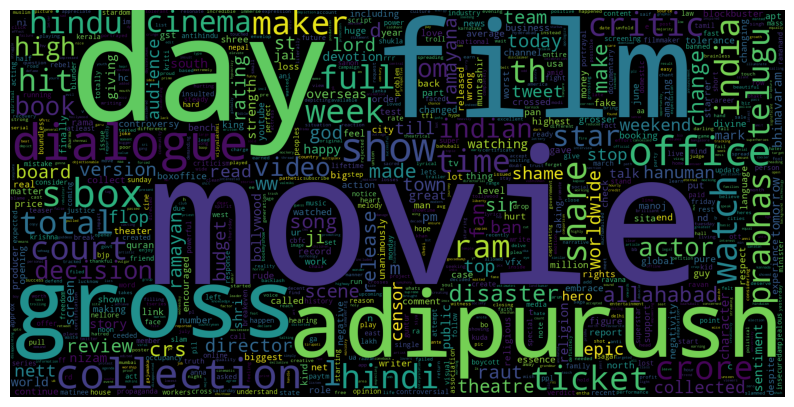

In [ ]:
from wordcloud import WordCloud
data=df3['cleaned_english_tweets']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

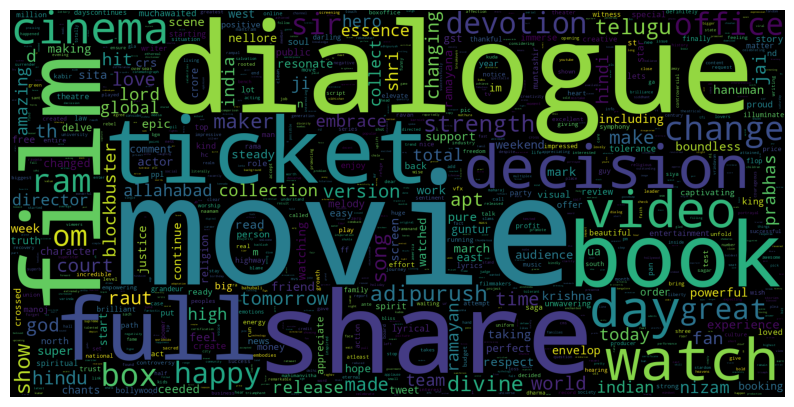

In [ ]:
data=df3[df3['overall_sentiment']=='pasitive']['cleaned_english_tweets']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

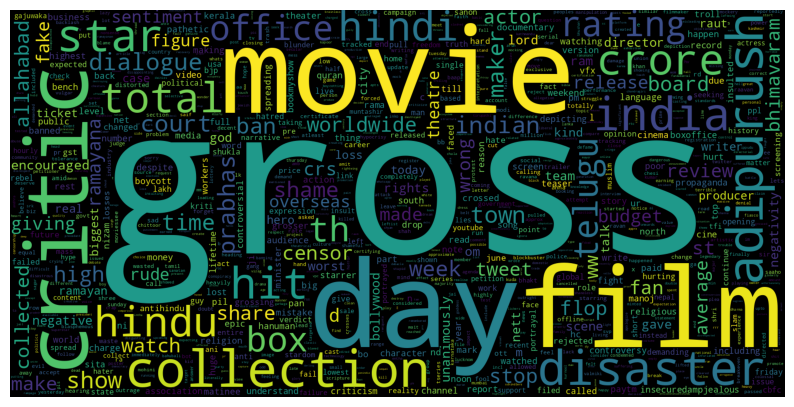

In [ ]:
data=df3[df3['overall_sentiment']=='negative']['cleaned_english_tweets']
plt.figure(figsize=[10,7])
wc=WordCloud(max_words=1000,width=1600,height=800,
             collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

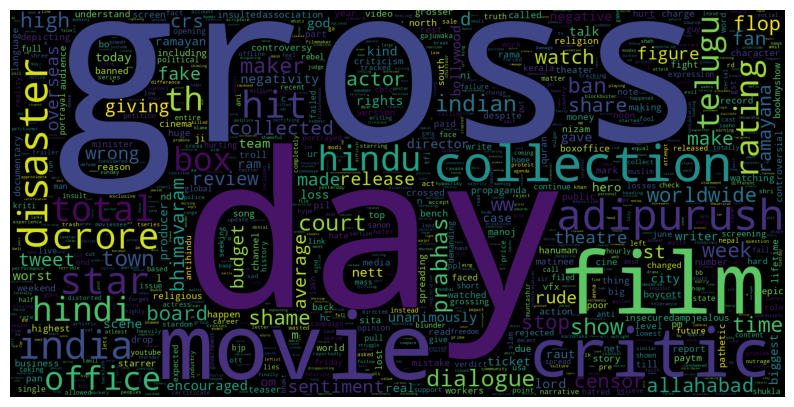

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if not data.empty:
    plt.figure(figsize=[10, 7])
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
else:
    print("NO data for 'neutral' sentiment. Unable to generate WordCloud.")


In [ ]:
df3

,overall_sentiment,cleaned_english_tweets
0,natural,womens ashes live streaming broadcast tv chann...
1,natural,playing book ticket
3,natural,adipurush vs hoorain vs kerala story controver...
5,natural,story told learn hotstar india graphic india g...
8,pasitive,milord compatriots backstab ie end exposing fa...
...,...,...
9989,negative,pathetic
9994,pasitive,empowering lyrics elevate spirit envelop world...
9998,pasitive,empowering lyrics elevate spirit envelop world...
9999,pasitive,choosing service product beneficial opt authen...


In [ ]:
X=df3['cleaned_english_tweets']
y=df3['overall_sentiment']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train_dtm=vect.transform(X_train)
X_test_dtm=vect.transform(X_test)


In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.1, max_df=0.7, max_features=100)


In [ ]:
vect_tunned=CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=0.1,max_df=0.7,max_features=100)

In [ ]:
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
X_train_tfidf=tfidf_transformer.transform(X_train_dtm)

In [ ]:
X_train_tfidf

<3839x8207 sparse matrix of type '<class 'numpy.float64'>'
	with 38351 stored elements in Compressed Sparse Row format>

In [ ]:
texts=df3['cleaned_english_tweets']
target=df3['overall_sentiment']

In [ ]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_length = len(tokenizer.word_index) + 1
vocab_length


9589

In [ ]:
!pip install tensorflow
!pip install nltk


In [ ]:
 import tensorflow as tf
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 from nltk.tokenize import word_tokenize


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def embed(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer.texts_to_sequences(corpus)

# Assuming df3 is your DataFrame containing 'cleaned_english_tweets' column
texts = df3["cleaned_english_tweets"]

# Use your 'embed' function to convert text sequences to integer sequences
train_padded_sentences = pad_sequences(
    embed(texts),
    padding='post'
)

train_padded_sentences


array([[2274, 1894,  334, ...,    0,    0,    0],
       [ 486,   38,  104, ...,    0,    0,    0],
       [   5,  454, 2277, ...,    0,    0,    0],
       ...,
       [ 865,  536,  809, ...,    0,    0,    0],
       [2769, 1558, 1250, ...,    0,    0,    0],
       [   3,  894,   95, ...,    0,    0,    0]], dtype=int32)

In [ ]:
embeddings_dictionary=dict()
embedding_dim=100
#load Slove 100d embeddings
with open('glove.6B.100d.txt',encoding='utf8') as fp:
  for line in fp.reaadlines():
    records=liine.split()
    word=records[0]
    vector_dimensions=np.asarray(records[1:],dtype='float32')
    embeddings_dictionary [word]=vector_dimensions


FileNotFoundError: ignored

In [ ]:
import numpy as np

embeddings_dictionary = dict()
embedding_dim = 100
glove_file = 'glove.6B.100d.txt'

with open(glove_file, encoding='utf8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(X_train_dtm,y_train)

In [ ]:
y_pred_class=nb.predict(X_test_dtm)
y_pred_prob=nb.predict_proba(X_test_dtm)[:,1]

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

In [ ]:
from sklearn .feature_extraction.text import TfidfTransformer,CountVectorizer

from sklearn.pipeline import Pipeline
pipe=Pipeline([
               ('bow',CountVectorizer()),
               ('tfid',TfidfTransformer()),
               ('model',MultinomialNB())
])

In [ ]:
pipe.fit(X_train,y_train)
y_pred_class=pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_class))

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=101)

In [ ]:
import xgboost as xgb

In [ ]:
pipe=Pipeline([
    ('bow',CountVectorizer()),
    ('tfid',TfidfTransformer()),
    ('model',xgb.XGBClassifier(,
            learning_rate=0.1
    max_depth=7
    n_estimators=80,
    use_label_encoder=False,
    evel_metrics='auc'
   ))

])

In [ ]:
pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc'  # Corrected the parameter name from 'evel_metrics' to 'eval_metric'
    ))
])


In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)
print('Test accuracy',acc)